## Gradient Descent Algorithm
Es un algoritmo iterativo de optimización para encontrar el minimo de una función.

1. m=0 c=0 l=0.0001 learning rate
2. Calcular la derivación parcial de la función de error con respecto a m y c -> $Dm = 1/n \sum 2(y' -(mx_i + c))(-x_i)$
* Derivada parcial wrt m, $Dm = -2/n \sum x_i(y_i - y'_i)$
* Derivada parcial wrt c, $Dc = -2/n \sum (yi - y'_i)$
3. Actualizar el valor de m y c usando estas ecuaciones
* $m = m - L x Dm$
* $c = c - L x Dc$
4. Repetir paso 2 y 3 hasta que Loss = 0 (idealmente)

# Ejercicio 3
En el blog https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 se explica con
claridad como usar el descenso de gradiente para un problema simple de regresión
lineal. Aplícalo a algún conjunto de datos que quieras en una libreta de Jupyter
explicando cada paso de manera cuidadosa. Extra: Teóricamente, este problema de
regresión lineal se puede resolver usando únicamente álgebra lineal (pero no es muy
eficiente computacionalmente). ¿Podrías explicar cómo? Busca por ejemplo cómo se
resuelve usando SVD.

## Regresión lineal
Es un enfoque lineal para modelar una relación de una variable dependiente y una (o más) variables independientes.
X es una variable independientes y Y es una variable dependiente, utilizando la formula $Y=mX+c$ (ecuación de la linea).
Queremos encontrar la mejor línea que haga mejor match a los datos. m y c


Columnas con NULL (antes):  STUDENT         0
SCHOOL          0
CITY            0
GROUP           0
SUBJECT         0
SCORE         332
STARTDATE       0
ENDDATE       332
DURATION      332
ACTIVITYID    332
dtype: int64


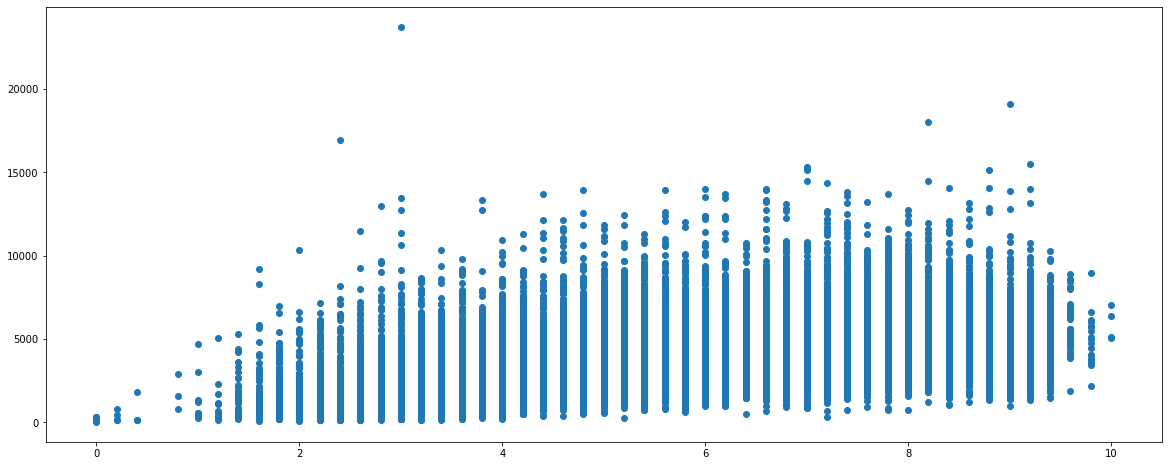

0        3.6
1        4.0
2        6.0
3        7.6
4        8.6
        ... 
15768    7.2
15769    5.8
15770    8.4
15771    2.6
15772    6.8
Name: SCORE, Length: 15442, dtype: float64   0        1064.0
1        5102.0
2        3418.0
3        5540.0
4        6887.0
          ...  
15768    4466.0
15769    4588.0
15770    6161.0
15771    4244.0
15772    4807.0
Name: DURATION, Length: 15442, dtype: float64


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

plt.rcParams['figure.figsize'] = (20.0, 8.0)

# Cargamos datos
data = pd.read_csv('sofiaxt-escuelasExamenes.csv')

# Limpiamos datos
print ("Columnas con NULL (antes): ", data.isnull().sum())
data=data.dropna()

X = data.iloc[:, 5] # 2ciudad,8duracion: 
Y = data.iloc[:, 8] # 5califiaciones 0-10

# Graficamos datos
plt.scatter(X, Y)
plt.show()


## Loss function (Mean Squared Error Function)

La pérdida es el error de nuestros valores predecidos m y c. El objetivo es minimizar este error al obtener el valor más preciso de m y c.

1. Diferencia entre el valor actual de $Y$ y el valor predecido de $Y$ -> $(yi - y'_i)$ -> $y'_i=mx_i+c$
2. Diferencia al cuadrado $(yi - y'_i)^2$
3. Encuentra el promedio de los cuadrados -> $1/n \sum (y_i - y'_i)^2$



## Gradient Descent Algorithm
Es un algoritmo iterativo de optimización para encontrar el minimo de una función.

1. m=0 c=0 l=0.0001 learning rate
2. Calcular la derivación parcial de la función de error con respecto a m y c -> $Dm = 1/n \sum 2(y' -(mx_i + c))(-x_i)$
* Derivada parcial wrt m, $Dm = -2/n \sum x_i(y_i - y'_i)$
* Derivada parcial wrt c, $Dc = -2/n \sum (yi - y'_i)$
3. Actualizar el valor de m y c usando estas ecuaciones
* $m = m - L x Dm$
* $c = c - L x Dc$
4. Repetir paso 2 y 3 hasta que Loss = 0 (idealmente)

In [72]:
# Costruimos modelo
m = 0
c = 0

L = 0.0001  # 0.0001 Learning rate
epochs = 1000 # 1000 Número de iteraciones
#Si learning rate es mas pequeño, se necesitan mas iteraciones

n = float(len(X)) # Number de elementos en X
print('Registros en X: ', n)

# Realizamos el descendiente de gradiente para obtener m y C con el menor error posible
for i in range(epochs): 
    Y_pred = m*X + c  # Valor predecido de Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivada wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivada wrt c
    m = m - L * D_m  # Actualizar m
    c = c - L * D_c  # Actualizar c

print ('m = ', m, ' c = ', c)

Registros en X:  15442.0
m =  677.308560735015  c =  127.56320458789162


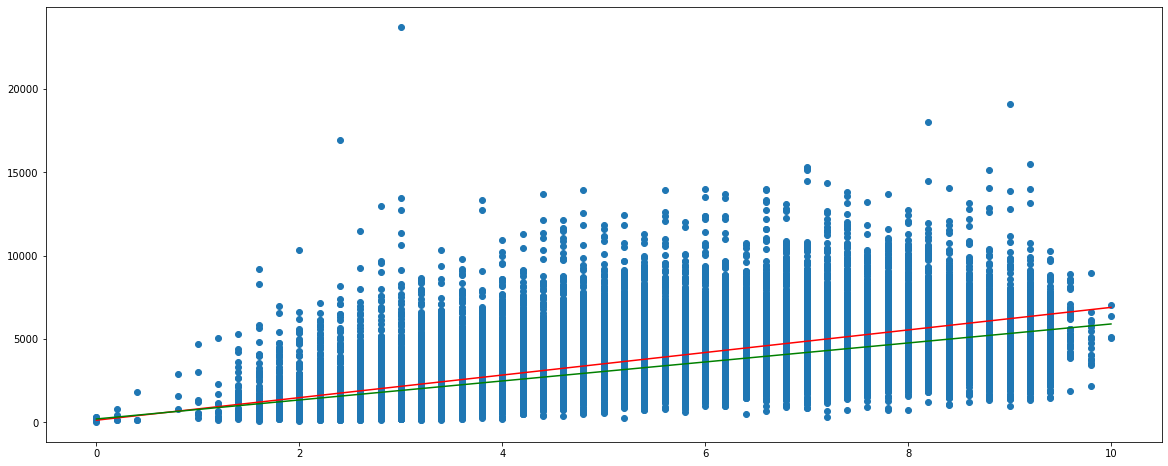

In [74]:
# Calculamos Y' multiplicnado por X*m y sumando C
Y_pred = m*X + c

data_0 = data.loc[data["SCORE"]==0]
data_10 = data.loc[data["SCORE"]==10]
Y_MinMean = st.mean( data_0.iloc[:, 8] ) 
Y_MaxMean = st.mean( data_10.iloc[:, 8] ) 

# Graficamos resultados
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regresión lineal
plt.plot([min(X), max(X)], [Y_MinMean, Y_MaxMean], color='green') # media
plt.show()



Observando la regresesión lineal para los datos, se puede tener una aproximación y notar cómo las personas que obtienen mejores calificaciones duraron tiempo en realizar las actividades en la plataforma.